# Practice Exam 6 - Clustering (KMeans)
โจทย์: สร้าง KMeans เพื่อจัดกลุ่มข้อมูล 2 มิติ และแสดงผลการแบ่งกลุ่ม (scatter plot).
- สร้างข้อมูล 3 clusters ด้วย sklearn.datasets.make_blobs
- รัน KMeans สำหรับ k=2..6 และเลือก k ที่เหมาะสมโดยดู Elbow plot
- แสดง scatter ของ cluster ที่เลือก และ centroids

         x1        x2
0 -7.201180 -7.475001
1 -7.481917 -7.149298
2 -1.933416  8.159696
3  4.487502  2.742313
4 -8.306314 -7.585770


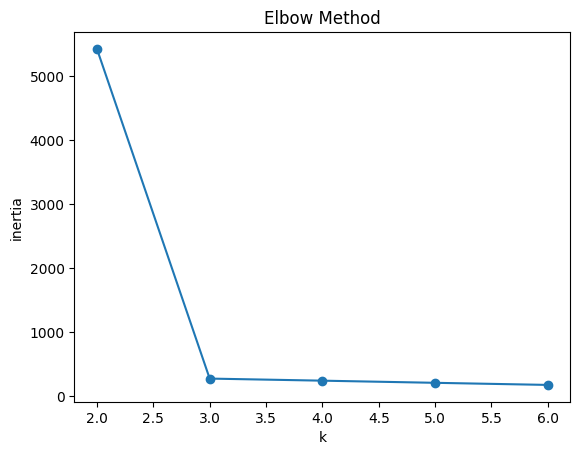

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.7, random_state=42)
df = pd.DataFrame(X, columns=['x1','x2'])
print(df.head())

# Starter: compute inertia for k=2..6 and plot elbow
inertias = []
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(range(2,7), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.show()

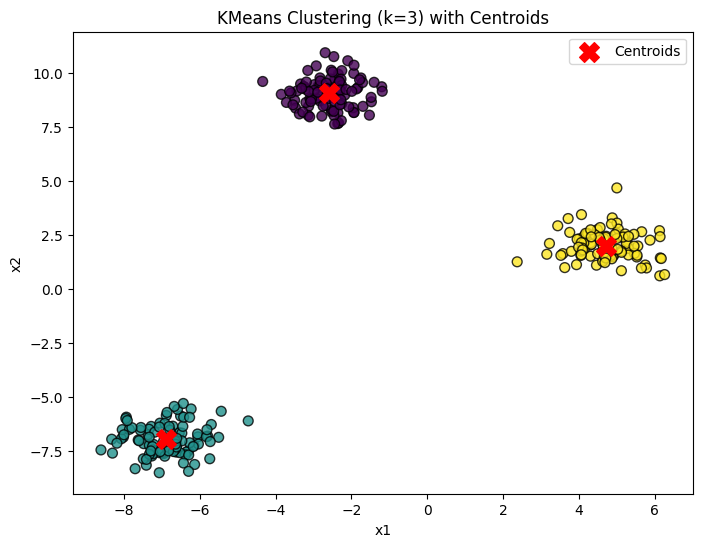

Cluster sizes: {np.int32(0): np.int64(100), np.int32(1): np.int64(100), np.int32(2): np.int64(100)}


In [3]:
# Choose k (default 3) - you can change this after checking the elbow plot
k = 3
X_vals = df[['x1','x2']].values
km = KMeans(n_clusters=k, random_state=42)
y_km = km.fit_predict(X_vals)

# Scatter by cluster labels and plot centroids
plt.figure(figsize=(8,6))
plt.scatter(X_vals[:,0], X_vals[:,1], c=y_km, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.8)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'KMeans Clustering (k={k}) with Centroids')
plt.legend()
plt.show()

# Optional: show counts per cluster
import numpy as np
unique, counts = np.unique(y_km, return_counts=True)
print('Cluster sizes:', dict(zip(unique, counts)))